In [96]:
import pandas as pd
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' not found. Make sure the CSV file is in the same directory as your notebook.")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset loaded successfully!

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
print("DataFrame Info:")
df.info
print("\nDescriptive Statistics for Numrical Columns:")
df.describe
print("\nNumber of Unique Values per Columnn:")
df.nunique

DataFrame Info:

Descriptive Statistics for Numrical Columns:

Number of Unique Values per Columnn:


<bound method DataFrame.nunique of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             D


Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


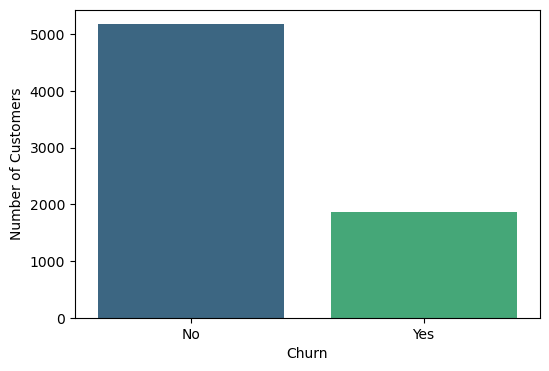

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
churn_counts = df['Churn'].value_counts()
print("\nChurn Distribution:")
print(churn_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', hue='Churn', data=df, palette='viridis', legend=False)
plt.ylabel('Number of Customers')
plt.show()

In [99]:
print("\nMissing Valuees per column:")
df.isnull().sum()


Missing Valuees per column:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [100]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("\nMissing values after converting TotalCharges:")
print(df.isnull().sum())

df.dropna(inplace=True)

print("\nDataFrame shape after dropping rows with missing values:")
print(df.shape)


Missing values after converting TotalCharges:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

DataFrame shape after dropping rows with missing values:
(7032, 21)


In [101]:
df=df.drop('customerID' , axis=1)
print("\n'customerID' column dropped")
df.head()


'customerID' column dropped


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
# Step 1: Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns identified:")
print(categorical_cols)

# Step 2: Print unique values
for col in categorical_cols:
    print(f"\nUnique values in '{col}': {df[col].unique()}")

# Step 3: Replace "No internet service"/"No phone service" with "No"
for col in ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Step 4: Map binary columns
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Gender'
]

for col in binary_cols:
    if col in df.columns and df[col].dtype == 'object' and set(df[col].unique()) <= {'Yes', 'No'}:
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    elif col in df.columns and col == 'Gender':
        df[col] = df[col].map({'Female': 1, 'Male': 0})

print("\nDataFrame after mapping binary and Gender columns:")
display(df.head())

# Step 5: One-Hot Encoding for remaining categorical cols
categorical_cols_for_ohe = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns remaining for One-Hot Encoding:")
print(categorical_cols_for_ohe)

df = pd.get_dummies(df, columns=categorical_cols_for_ohe, drop_first=True)

print("\nDataFrame after One-Hot Encoding:")
display(df.head())
print(df.shape)



Categorical columns identified:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Unique values in 'gender': ['Female' 'Male']

Unique values in 'Partner': ['Yes' 'No']

Unique values in 'Dependents': ['No' 'Yes']

Unique values in 'PhoneService': ['No' 'Yes']

Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']

Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']

Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']

Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']

Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']

Unique values in 'TechSupport': ['No' 'Yes' 'No internet service']

Unique values in 'StreamingTV': ['No' 'Yes' 'No internet service']

Unique values in 'StreamingMovies': ['No' 'Yes' 'No inter

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1



Categorical columns remaining for One-Hot Encoding:
['gender', 'InternetService', 'Contract', 'PaymentMethod']

DataFrame after One-Hot Encoding:


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,True,False,False,True,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,True,False,False,False,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,True,False,False,True,False,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,False,True,False,False,False,False,True,False


(7032, 24)


In [103]:
from sklearn.preprocessing import StandardScaler
numerical_cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
scaler=StandardScaler()
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])
print("\nDataFrame after scaling numerical features:")
df.head()


DataFrame after scaling numerical features:


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.280248,0,0,0,1,0,0,...,-0.994194,0,False,False,False,False,False,False,True,False
1,0,0,0,0.064303,1,0,1,0,1,0,...,-0.173740,0,True,False,False,True,False,False,False,True
2,0,0,0,-1.239504,1,0,1,1,0,0,...,-0.959649,1,True,False,False,False,False,False,False,True
3,0,0,0,0.512486,0,0,1,0,1,1,...,-0.195248,0,True,False,False,True,False,False,False,False
4,0,0,0,-1.239504,1,0,0,0,0,0,...,-0.940457,1,False,True,False,False,False,False,True,False


In [104]:
from sklearn.model_selection import train_test_split

# Separate the data into features (X) and the target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Create the training and testing sets using stratification
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y) # This ensures the split is fair

# Verify that the churn proportion is the same everywhere
print("--- Data Split Verification ---")
print(f"Original Churn Proportion: {y.mean():.2f}")
print(f"Proportion of Churn in y_train: {y_train.mean():.2f}")
print(f"Proportion of Churn in y_test: {y_test.mean():.2f}")

--- Data Split Verification ---
Original Churn Proportion: 0.27
Proportion of Churn in y_train: 0.27
Proportion of Churn in y_test: 0.27


In [105]:
from imblearn.over_sampling import SMOTE

# --- Check the class distribution before SMOTE ---
print("--- Balancing the Training Data with SMOTE ---")
print("Distribution Before SMOTE:")
print(y_train.value_counts())

# --- Apply SMOTE ---
# This creates new synthetic samples for the minority class (Churn=1)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# --- Check the class distribution after SMOTE ---
print("\nDistribution After SMOTE:")
print(y_train_smote.value_counts())

--- Balancing the Training Data with SMOTE ---
Distribution Before SMOTE:
Churn
0    3614
1    1308
Name: count, dtype: int64

Distribution After SMOTE:
Churn
1    3614
0    3614
Name: count, dtype: int64


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
log_reg=LogisticRegression(random_state=42,solver='liblinear')
rf_clf=RandomForestClassifier(random_state=42,n_estimators=100)
xgb_clf=XGBClassifier(random_state=42,eval_metric='logloss')
models={    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf
}
#Training and Cross-validation
print("\n--- Model Training and Cross-Validation ---")
results = {}
for name,model in models.items():
    #1train the model
    model.fit(X_train,y_train)
    #perform crossvalidation
    cv_scores=cross_val_score(model,X_train,y_train,cv=5,scoring='roc_auc')
    results[name]={
            "Model": model,
        "CV_Mean_ROC_AUC": cv_scores.mean(),
        "CV_Std_ROC_AUC": cv_scores.std()
    }
    print(f"{name} -CV ROC-AUC:{cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    


--- Model Training and Cross-Validation ---
Logistic Regression -CV ROC-AUC:0.8481 (+/- 0.0151)
Random Forest -CV ROC-AUC:0.8287 (+/- 0.0170)
XGBoost -CV ROC-AUC:0.8230 (+/- 0.0172)


In [107]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
print("\n--- Hyperparameter Tuning (Randomized Search for XGBoost) ---")
param_dist={ 
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
     'colsample_bytree': uniform(0.6, 0.4)
}
random_search=RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42,eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train,y_train)
best_xgb_clf = random_search.best_estimator_
best_score=random_search.best_score_
print(f"\nBest XGBoost Model ROC-AUC Score (from CV): {best_score:.4f}")
print(f"Best Parameters: {random_search.best_params_}")


--- Hyperparameter Tuning (Randomized Search for XGBoost) ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/youssef/anaconda3/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/youssef/anaconda3/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. C


Best XGBoost Model ROC-AUC Score (from CV): 0.8037
Best Parameters: {'colsample_bytree': np.float64(0.871025744736913), 'learning_rate': np.float64(0.014976348678356847), 'max_depth': 5, 'n_estimators': 246, 'subsample': np.float64(0.7394663949166917)}



--- Training model on balanced data... ---
Training complete.

--- Final Model Evaluation (After SMOTE) ---
ROC-AUC Score: 0.8306

New Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1549
           1       0.53      0.77      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.77      2110

New Confusion Matrix:


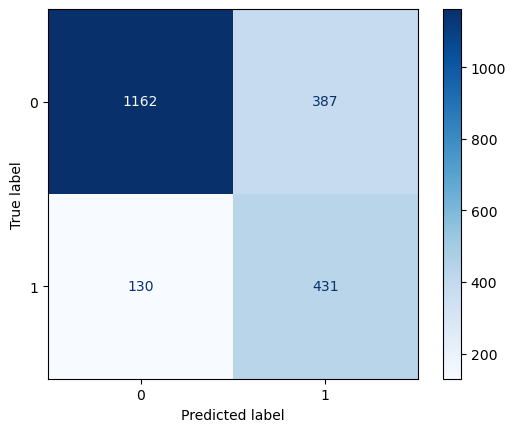

In [108]:
# Import the necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the same best model you had before
best_params = {
    'colsample_bytree': 0.871, 'learning_rate': 0.015, 'max_depth': 5,
    'n_estimators': 246, 'subsample': 0.739
}
xgb_smote = XGBClassifier(random_state=42, eval_metric='logloss', **best_params)

# --- TRAIN on the BALANCED (SMOTE) data ---
print("\n--- Training model on balanced data... ---")
xgb_smote.fit(X_train_smote, y_train_smote)
print("Training complete.")

# --- EVALUATE on the ORIGINAL, UNSEEN test data ---
print("\n--- Final Model Evaluation (After SMOTE) ---")
y_pred_smote = xgb_smote.predict(X_test)
y_pred_proba_smote = xgb_smote.predict_proba(X_test)[:, 1]

# Print the new evaluation metrics
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_smote):.4f}\n")
print("New Classification Report:")
print(classification_report(y_test, y_pred_smote))

print("New Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(xgb_smote, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

Best Threshold to maximize F1-Score: 0.4978
F1-Score at this threshold: 0.6271

--- New Classification Report (with Optimal Threshold) ---
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1549
           1       0.53      0.77      0.63       561

    accuracy                           0.76      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.76      0.77      2110


New Confusion Matrix (with Optimal Threshold):


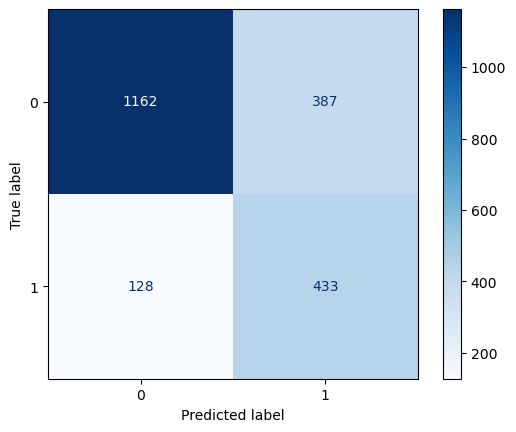

Exception ignored in: <function ResourceTracker.__del__ at 0x78e0aaf7a840>
Traceback (most recent call last):
  File "/home/youssef/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/youssef/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/youssef/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7a1742f82840>
Traceback (most recent call last):
  File "/home/youssef/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/youssef/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/youssef/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTrac

In [109]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np

# --- Find the Optimal Prediction Threshold ---
# Get the prediction probabilities from your SMOTE-trained model
y_pred_proba_smote = xgb_smote.predict_proba(X_test)[:, 1]

# Calculate precision, recall for all possible thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_smote)

# Find the threshold that maximizes the F1-score
# We add a small value to the denominator to avoid division by zero
f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-6)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold to maximize F1-Score: {best_threshold:.4f}")
print(f"F1-Score at this threshold: {f1_scores[best_threshold_index]:.4f}")

# --- Re-evaluate using the new, optimal threshold ---
# Get new predictions by applying the best threshold
y_pred_optimal = (y_pred_proba_smote >= best_threshold).astype(int)

print("\n--- New Classification Report (with Optimal Threshold) ---")
print(classification_report(y_test, y_pred_optimal))

print("\nNew Confusion Matrix (with Optimal Threshold):")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimal, cmap=plt.cm.Blues)
plt.show()